# Assignment 2

This assignment serves as a comprehensive evaluation of your machine learning skills, encompassing not only the technical aspects of model development but also your ability to analyze, interpret, and present data insights effectively. As such, it's essential to ensure that your submission is complete, functional, and devoid of any obvious gaps, as if you were delivering this project to a client.

To achieve this, leverage the full capabilities of Markdown and the interactive visualization tools available in Jupyter notebooks to craft a well-structured and visually appealing report of your findings. Your report should clearly communicate the insights you've gained from the exploratory data analysis, the rationale behind your data preprocessing and feature engineering decisions, and a thorough analysis of feature importance. High-quality visualizations and well-organized documentation will not only support your analysis but also make your results more accessible and understandable to your audience.

Remember, the ability to present complex results in an intuitive and engaging manner is a crucial skill, almost as important as the technical proficiency in model building and data analysis. Treat this assignment as an opportunity to showcase your skills in both areas.

## Instructions
- Your submission should be a `.ipynb` file with your name,
  like `FirstnameLastname.ipynb`. It should include the answers to the questions in markdown cells, your data analysis and results.
- You are expected to follow the best practices for code writing and model
training. Poor coding style will be penalized.
- You are allowed to discuss ideas with your peers, but no sharing of code.
Plagiarism in the code will result in failing. If you use code from the
internet, cite it by adding the source of the code as a comment in the first line of the code cell. [Academic misconduct policy](https://wiki.innopolis.university/display/DOE/Academic+misconduct+policy)
- In real life clients can give unclear goals or requirements. So, if the instructions seem vague, use common sense to make reasonable assumptions and decisions.

## Self-Reliance and Exploration
In this task, you're encouraged to rely on your resourcefulness and creativity. Dive into available resources, experiment with various solutions, and learn from every outcome. While our team is here to clarify task details and offer conceptual guidance, we encourage you to first seek answers independently. This approach is vital for developing your problem-solving skills in machine learning.



# Task 1: [Where's Waldo?](https://www.wikihow.com/Find-Waldo) (50%)

## Fingerprinting
Browser fingerprinting is a technique used to identify and track individuals based on unique characteristics of their web browser configuration. These characteristics can include the browser type, version, installed plugins, and screen resolution, among others. By combining these attributes, websites can create a digital fingerprint that can be used to track user behavior across multiple sites, even if they clear their cookies or use different devices. This has raised concerns about privacy and the potential for this technology to be used for targeted advertising, surveillance, and other purposes.

[Read more about Fingerprinting](https://datadome.co/learning-center/browser-fingerprinting-techniques/)


## What You Need to Do
In this task, you are required to employ a fully connected feed-forward Artificial Neural Network (ANN) to tackle a classification problem. This involves several key steps, each critical to the development and performance of your model:

- **Exploratory Data Analysis (EDA) (10%)**: Begin by conducting a thorough exploratory analysis of the provided dataset. Your goal here is to uncover patterns, anomalies, relationships, or trends that could influence your modeling decisions. **Share the insights** you gather from this process and explain how they informed your subsequent steps.
  
- **Data Preprocessing and Feature Engineering (10%)**: Based on your EDA insights, choose and implement the most appropriate data preprocessing steps and feature engineering techniques. This may include handling missing values, encoding categorical variables, normalizing data, and creating new features that could enhance your model's ability to learn from the data.
  
- **Model Design and Training (10%)**: Design a fully connected feed-forward ANN model. You will need to experiment with different architectures, layer configurations, and hyperparameters to find the most effective solution for the classification problem at hand.

- **Feature Importance Analysis (10%)**: After developing your model, analyze which features are most important for making predictions. Discuss how this analysis aligns with your initial EDA insights and what it reveals about the characteristics most indicative of specific user behaviors or identities.

- **Evaluation (10%)**: You will be required to submit your model prediction on a hidden data set.

### Data
You will be using the data in `Task_1.json` to identify Waldo (`user_id=0`). The dataset includes:
- **"browser", "os" and "locale"**: Information about the software used.
- **"user_id"**: A unique identifier for each user.
- **"location"**: Geolocation based on the IP address used.
- **"sites"**: A list of visited URLs and the time spent there in seconds.
- **"time" and "date"**: When the session started in GMT.


### Evaluation
After training, evaluate your model by printing the classification report on your test set. Then, predict whether each user in `task_1_verify.json` is Waldo or not, by adding the boolean `is_waldo` property to the `task_1_verify.json`:

```diff
  [
    {
+     "is_waldo": false,
      "browser": "Chrome",
      "os": "Debian",
      "locale": "ur-PK",
      "location": "Russia/Moscow",
      "sites": [
          // ...
      ],
      "time": "04:12:00",
      "date":"2017-06-29"
    }
    // ...
  ]

```

## Learning Objectives

- **Exploratory Data Analysis**: Apply suitable analysis techniques to gain insights and better understand the dataset.
- **Classification Approach**: Identify the most appropriate method for the given problem.
- **Data Preprocessing**: Select and execute proper preprocessing and encoding techniques.
- **Model Implementation**: Utilize ANNs to address a classification problem, including training, validation, and testing phases.
- **Feature Importance Analysis**: Determine and report which features are most critical for the model's predictions to uncover insights into specific user behaviors.

EDA

In [1]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import shap
shap.initjs()

In [2]:
# read and visualize training data
train_data = pd.read_json("task_1_train_data.json")
train_data.head()

,browser,os,locale,user_id,location,sites,time,date
0,Chrome,Debian,ur-PK,116,Russia/Moscow,"[{'site': 'bing.net', 'length': 52}, {'site': ...",04:12:00,2017-06-29
1,Firefox,Windows 8,uk-UA,155,France/Paris,"[{'site': 'yahoo.com', 'length': 46}, {'site':...",03:57:00,2016-03-23
2,Safari,MacOS,fr-FR,39,Japan/Tokyo,"[{'site': 'oracle.com', 'length': 335}]",05:26:00,2016-11-17
3,Chrome,Windows 8,nl-NL,175,Australia/Sydney,"[{'site': 'mail.google.com', 'length': 192}, {...",00:05:00,2016-08-23
4,Firefox,Ubuntu,ro-RO,50,USA/San Francisco,"[{'site': 'mail.google.com', 'length': 266}, {...",22:55:00,2016-07-23


First of all, we can simplify sites column to merge it in more appropriate way of representation

In [3]:
# reformat sites into more convenient to understood way
def sites_reformating(data):
    reformatted = []    
    for site_data in data:
        reformatted.append((site_data['site'], site_data['length']))
    return reformatted
sites_data = train_data['sites']
new_sites = sites_data.apply(sites_reformating)  

In [4]:
# print reformated data
train_data['sites'] = new_sites
train_data.head()

,browser,os,locale,user_id,location,sites,time,date
0,Chrome,Debian,ur-PK,116,Russia/Moscow,"[(bing.net, 52), (live.com, 52), (twitter.com,...",04:12:00,2017-06-29
1,Firefox,Windows 8,uk-UA,155,France/Paris,"[(yahoo.com, 46), (baidu.com, 134), (wikimedia...",03:57:00,2016-03-23
2,Safari,MacOS,fr-FR,39,Japan/Tokyo,"[(oracle.com, 335)]",05:26:00,2016-11-17
3,Chrome,Windows 8,nl-NL,175,Australia/Sydney,"[(mail.google.com, 192), (slack.com, 88), (you...",00:05:00,2016-08-23
4,Firefox,Ubuntu,ro-RO,50,USA/San Francisco,"[(mail.google.com, 266), (mail.google.com, 168...",22:55:00,2016-07-23


Now, let's see at all possible locations, browsers, operating systems, etc.

Browsers info: ['Chrome', 'Firefox', 'Safari', 'Internet Explorer'] 4


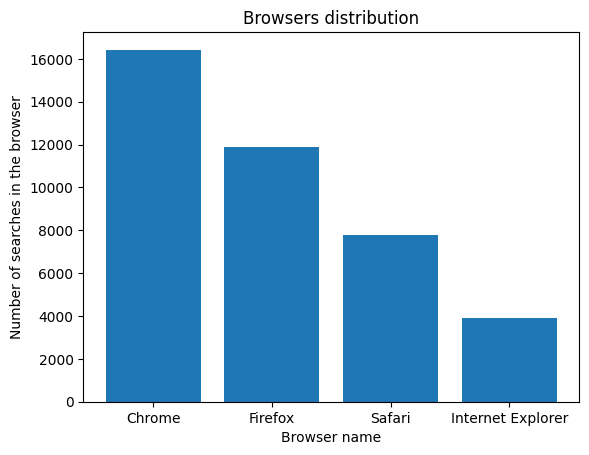

In [5]:
# print browsers info
print("Browsers info:", train_data['browser'].unique().tolist(), len(train_data['browser'].unique().tolist()))
# visualize browsers info
# I'll visualize it with the according frequency of using these browsers among users
browser_names = train_data['browser'].unique().tolist() 
browser_counts = train_data['browser'].value_counts()
browser_counts_ordered = [browser_counts[name] for name in browser_names]
plt.bar(browser_names,browser_counts)
plt.title("Browsers distribution")
plt.xlabel("Browser name")
plt.ylabel("Number of searches in the browser")
plt.show()

As we can see, the most popular browser is the Chrome, while the most unpopular is Internet Explorer.

OS names and amount: ['Debian', 'Windows 8', 'MacOS', 'Ubuntu', 'Windows 10', 'Windows 7'] 6


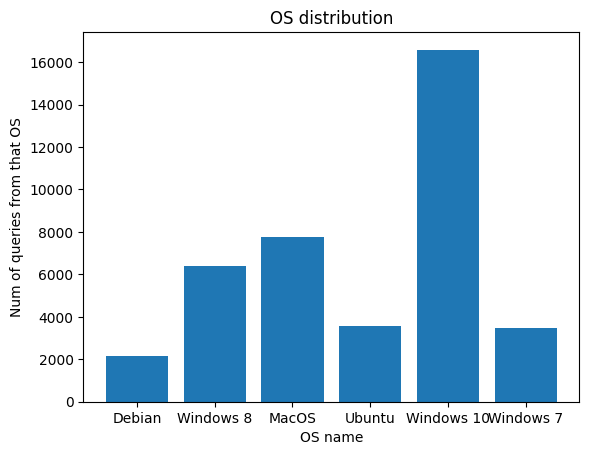

In [6]:
# print os data
print("OS names and amount:", train_data['os'].unique().tolist(), len(train_data['os'].unique().tolist()))
# visualize the data
os_names = train_data['os'].unique().tolist()
os_num = train_data['os'].value_counts()
os_num_ordered = [os_num[name] for name in os_names]
plt.bar(os_names, os_num_ordered)
plt.title("OS distribution")
plt.xlabel("OS name")
plt.ylabel("Num of queries from that OS")
# plt.hist(os_num)
plt.show()

The most popular OS is windows 10

Locale names: ['ur-PK', 'uk-UA', 'fr-FR', 'nl-NL', 'ro-RO', 'en-US', 'en-NZ', 'vi-VN', 'pt-BR', 'es-MX', 'ja-JP', 'en-GB', 'en-SG', 'ru_RU', 'pt-PT', 'zh-CN', 'bg-BG', 'wo-SN', 'de-DE', 'pl-PL', 'it-IT', 'xh-ZA', 'ru-RU', 'en-AU', 'en-CA'] 25


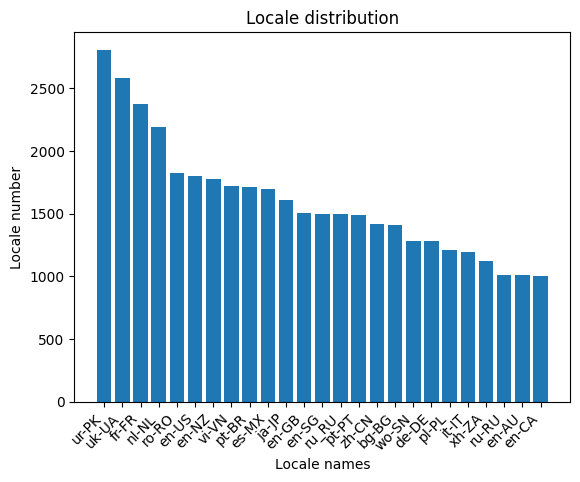

In [7]:
# print locale data
print("Locale names:",train_data['locale'].unique().tolist(), len(train_data['locale'].unique().tolist()))
locale_names = train_data['locale'].unique().tolist()
locale_counts = train_data['locale'].value_counts()
locale_counts_ordered = [locale_counts[name] for name in locale_names]
plt.bar(locale_names, locale_counts)
plt.xlabel("Locale names")
plt.ylabel("Locale number")
plt.title("Locale distribution")
# To display text properly
plt.xticks(rotation=45, ha='right')
plt.show()

Location names: ['Russia/Moscow', 'France/Paris', 'Japan/Tokyo', 'Australia/Sydney', 'USA/San Francisco', 'Canada/Vancouver', 'UK/London', 'Canada/Toronto', 'Malaysia/Kuala Lumpur', 'USA/Miami', 'Italy/Rome', 'Spain/Madrid', 'USA/Chicago', 'Germany/Berlin', 'China/Shanghai', 'India/Delhi', 'Brazil/Rio de Janeiro', 'Singapore/Singapore', 'Netherlands/Amsterdam', 'USA/New York', 'New Zealand/Auckland'] 21


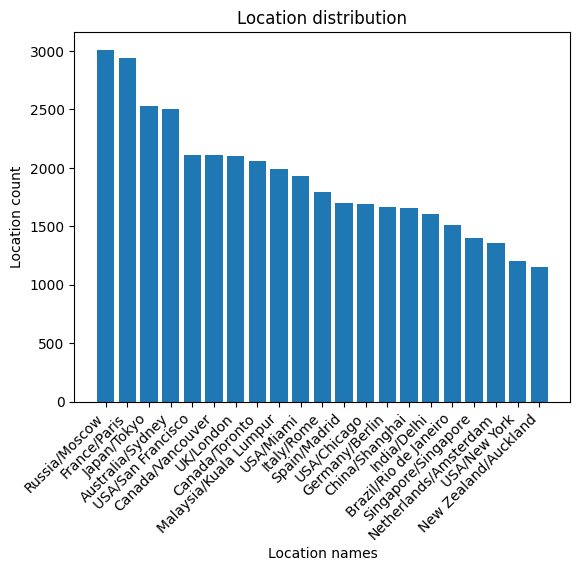

In [8]:
# print locations
print("Location names:", train_data['location'].unique().tolist(),len(train_data['location'].unique().tolist()))
# visualize the data
location_names = train_data['location'].unique().tolist()
location_count = train_data['location'].value_counts()
location_count_ordered = [[location_count[name] for name in location_names]]
plt.bar(location_names, location_count)
plt.xlabel("Location names")
plt.ylabel("Location count")
plt.title("Location distribution")
plt.xticks(rotation=45, ha='right')
plt.show()

The most popular locations are Russia/Moscow and France/Paris

In [9]:
# Collect information about duration of using sites
sites_usage = {}
for site in train_data['sites']:
    for cur_site in site:
        if cur_site[0] not in sites_usage.keys():
            sites_usage[cur_site[0]] = cur_site[1]
        else:
            sites_usage[cur_site[0]] += cur_site[1]

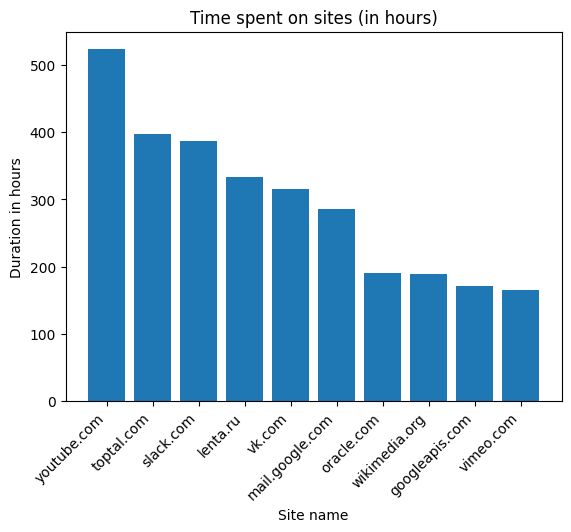

In [10]:
# Choose and plot top 10 sites (in hours)
sorted_sites = sorted(sites_usage.items(), key=lambda x: x[1], reverse=True)
sites_top = sorted_sites[:10]
sites_top_names = [site[0] for site in sites_top]
sites_top_count = [site[1] / 3600 for site in sites_top]
total_time = sum(sites_usage.values()) / 3600
others_time = total_time - sum(sites_top_count)
# Don't output other sites because time is very big for them
plt.bar(sites_top_names, sites_top_count)
plt.title("Time spent on sites (in hours)")
plt.xlabel("Site name")
plt.ylabel("Duration in hours")
plt.xticks(rotation=45, ha='right')
plt.show()

We can see that most popular sites among users are youtube.com, toptal.com, slack.com. lenta.ru, and others. 

I'll work with the time and date column a bit later, because I want to merge this column together, it seems more suitable for me, but I don't want to change initial data yet, it will be performed on the data preprocessing stage. Let's explore Waldo's usage of the internet to understand his habbits and desires.

In [11]:
# Let's perform same analysis for Waldo
waldo = train_data[train_data['user_id']==0]
waldo.head()

,browser,os,locale,user_id,location,sites,time,date
95,Firefox,Ubuntu,ru_RU,0,USA/Chicago,"[(mail.google.com, 75), (vk.com, 151), (toptal...",02:47:00,2016-11-05
254,Firefox,Windows 10,ru_RU,0,France/Paris,"[(lenta.ru, 43), (vk.com, 53), (vente-privee.c...",20:52:00,2016-05-05
292,Chrome,Windows 10,ru_RU,0,USA/Chicago,"[(vk.com, 79), (mail.google.com, 55), (toptal....",03:38:00,2017-05-12
366,Chrome,Windows 10,ru_RU,0,France/Paris,"[(mail.google.com, 71), (vk.com, 53), (toptal....",11:04:00,2016-05-19
435,Chrome,Windows 10,ru_RU,0,France/Paris,"[(mail.google.com, 72), (vk.com, 50), (toptal....",20:22:00,2016-06-27


In [12]:
# print waldo's locations, locales, and os
print(waldo['location'].unique().tolist())
print(waldo['locale'].unique().tolist())
print(waldo['os'].unique().tolist())
sites_duration = {}
for site in waldo['sites']:
    for cur_site in site:
        if cur_site[0] not in sites_duration.keys():
            sites_duration[cur_site[0]] = cur_site[1]
        else:
            sites_duration[cur_site[0]] += cur_site[1]

['USA/Chicago', 'France/Paris', 'Canada/Toronto']
['ru_RU']
['Ubuntu', 'Windows 10']


In [13]:
sites_usage_waldo = {}
for site in waldo['sites']:
    for cur_site in site:
        if cur_site[0] not in sites_usage_waldo.keys():
            sites_usage_waldo[cur_site[0]] = cur_site[1]
        else:
            sites_usage_waldo[cur_site[0]] += cur_site[1]
# print(sites_usage_waldo)

First of all, we see, that locale should be only ru_RU for waldo user. After that I obtain the result of overall time spent in the internet. By analyzing the date column, I explore that observation time of the data is approximately one year. As for me, it is natural decision to bound the time to consider "favorite" websites of wando with duration at least 10 minutes in summary during the year. Less than 10 minutes time spent on website may be a misc-lick or some opened not intentionally website, because we spend really huge amount of time per year on the website which we are really frequently using. So, let's put our concentration on the following websites:  'mail.google.com': 22500, 'vk.com': 22475, 'toptal.com': 23964, 'lenta.ru': 26451, 'slack.com': 23775, 'youtube.com': 22263, mairie-gruson.fr : 831. Operation systems used: ubuntu, windows10. Locations are: USA/Chicago, Canada/Toronto, France/Paris.

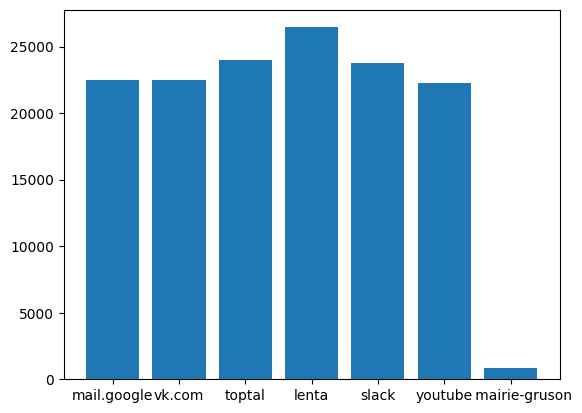

In [14]:
# Visualize the data
y = [22500, 22475, 23964, 26451, 23775, 22263, 831]
names = ['mail.google', 'vk.com', 'toptal', 'lenta', 'slack', 'youtube', '      mairie-gruson']
plt.bar(names, y)
plt.show()

Overall, due to performed operations with visualization and insignificant reformation of the data I obtain initial understanding of the dataset and sketch the following operations to do: Encode browser, location, locale, and os columns. I want to put it in my further analysis for neural network, they're important. Talking about sites, I'm not sure, but I want to drop this column, because in my opinion it may lead to the overfitting of the model. Imagine, to change OS, locale, location we should spend some time, money, efforts, etc. In the same time, training model based on the websites is ambiguous. Maybe we want to visit new site that we meet on the billboard or, again, as I describe above make a miscklick or similar actions. In my opinion, this approach may be successful, because visited sites is not the most important thing to detect waldo. I'll explore this and maybe change my opinion.

Data Preprocessing and Feature Engineering

In [15]:
# Let's check null values in train data.
print(train_data.isnull().any())
# We have no missed values.
# Let's start encoding
# read verification data
verification_data = pd.read_json('task_1_verify.json')
verification_data

browser     False
os          False
locale      False
user_id     False
location    False
sites       False
time        False
date        False
dtype: bool


,browser,os,locale,location,sites,time,date
0,Internet Explorer,Windows 8,xh-ZA,France/Paris,"[{'site': 'baidu.com', 'length': 201}, {'site'...",14:13:00,2016-11-05
1,Chrome,Windows 10,ja-JP,Germany/Berlin,"[{'site': 'toptal.com', 'length': 96}, {'site'...",21:06:00,2017-02-22
2,Chrome,Windows 10,it-IT,Singapore/Singapore,"[{'site': 'bing.net', 'length': 225}, {'site':...",13:17:00,2016-01-30
3,Chrome,Windows 10,ur-PK,UK/London,"[{'site': 'google.com', 'length': 113}, {'site...",17:00:00,2017-02-27
4,Firefox,Ubuntu,en-CA,Russia/Moscow,"[{'site': 'googleapis.com', 'length': 243}, {'...",18:11:00,2017-04-19
...,...,...,...,...,...,...,...
39995,Firefox,Windows 10,en-AU,India/Delhi,"[{'site': 'instagram.com', 'length': 170}, {'s...",14:12:00,2016-08-27
39996,Chrome,Windows 10,en-US,Italy/Rome,"[{'site': 'youtube.com', 'length': 55}, {'site...",18:49:00,2016-07-12
39997,Chrome,Windows 8,en-SG,USA/Chicago,"[{'site': 'mail.google.com', 'length': 178}, {...",15:58:00,2016-06-22
39998,Chrome,Windows 10,xh-ZA,UK/London,"[{'site': 'toptal.com', 'length': 89}, {'site'...",05:30:00,2016-05-19


In [16]:
from sklearn.preprocessing import OneHotEncoder
# Initialize OneHotEncoder and specify columns to be encoded
encoder = OneHotEncoder(sparse_output=False, drop=None)
f_names = ['browser', 'os', 'locale', 'location']
# lab 3 encoder function code
def encoding (df,f_names, encoder):
    '''
    This function performs splitting and concatanation of the parsed type_1
    column and initial dataset
    :param df : dataFrame to be concatenated
    :param feature_names : set of columns to be encoded
    :param encoder: OneHotEncoder.
    :return new_df with encoded initial columns
    '''
    # Perform OneHotEncoding for specified columns and concatanate with initial
    # df
    X_encoded = encoder.fit_transform(df[f_names])
    encoded_columns = encoder.get_feature_names_out(f_names)
    X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_columns)
    new_df = pd.concat([df.reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)
    new_df.drop(f_names, axis=1, inplace=True)
    return new_df

# Call encoding function
train_data_encoded = encoding(train_data,f_names, encoder)
verification_data_encoded = encoding(verification_data,f_names, encoder)

In [17]:
train_data_encoded.head()

,user_id,sites,time,date,browser_Chrome,browser_Firefox,browser_Internet Explorer,browser_Safari,os_Debian,os_MacOS,...,location_Netherlands/Amsterdam,location_New Zealand/Auckland,location_Russia/Moscow,location_Singapore/Singapore,location_Spain/Madrid,location_UK/London,location_USA/Chicago,location_USA/Miami,location_USA/New York,location_USA/San Francisco
0,116,"[(bing.net, 52), (live.com, 52), (twitter.com,...",04:12:00,2017-06-29,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,155,"[(yahoo.com, 46), (baidu.com, 134), (wikimedia...",03:57:00,2016-03-23,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,39,"[(oracle.com, 335)]",05:26:00,2016-11-17,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,175,"[(mail.google.com, 192), (slack.com, 88), (you...",00:05:00,2016-08-23,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50,"[(mail.google.com, 266), (mail.google.com, 168...",22:55:00,2016-07-23,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
# Merging time columns
train_data_encoded['time'] = train_data['date'].astype(str) + ' ' + train_data_encoded['time']  
train_data_encoded.head()
verification_data_encoded['time'] = verification_data_encoded['date'].astype(str) + ' ' + verification_data_encoded['time']

In [19]:
# drop date column
train_data_encoded = train_data_encoded.drop('date', axis=1)
verification_data_encoded = verification_data_encoded.drop('date', axis=1)
train_data_encoded.head()


,user_id,sites,time,browser_Chrome,browser_Firefox,browser_Internet Explorer,browser_Safari,os_Debian,os_MacOS,os_Ubuntu,...,location_Netherlands/Amsterdam,location_New Zealand/Auckland,location_Russia/Moscow,location_Singapore/Singapore,location_Spain/Madrid,location_UK/London,location_USA/Chicago,location_USA/Miami,location_USA/New York,location_USA/San Francisco
0,116,"[(bing.net, 52), (live.com, 52), (twitter.com,...",2017-06-29 04:12:00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,155,"[(yahoo.com, 46), (baidu.com, 134), (wikimedia...",2016-03-23 03:57:00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,39,"[(oracle.com, 335)]",2016-11-17 05:26:00,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,175,"[(mail.google.com, 192), (slack.com, 88), (you...",2016-08-23 00:05:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50,"[(mail.google.com, 266), (mail.google.com, 168...",2016-07-23 22:55:00,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
# Drop sites column
train_data_encoded = train_data_encoded.drop('sites', axis=1)
verification_data_encoded = verification_data_encoded.drop('sites', axis=1)
train_data_encoded.head()

,user_id,time,browser_Chrome,browser_Firefox,browser_Internet Explorer,browser_Safari,os_Debian,os_MacOS,os_Ubuntu,os_Windows 10,...,location_Netherlands/Amsterdam,location_New Zealand/Auckland,location_Russia/Moscow,location_Singapore/Singapore,location_Spain/Madrid,location_UK/London,location_USA/Chicago,location_USA/Miami,location_USA/New York,location_USA/San Francisco
0,116,2017-06-29 04:12:00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,155,2016-03-23 03:57:00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,39,2016-11-17 05:26:00,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,175,2016-08-23 00:05:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50,2016-07-23 22:55:00,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
# Encode time as it is cyclic feature. Use both sin and cos to fix the issue between long distance among 23 and 0 hours.
# Reference: https://www.kaggle.com/code/franco12/timestamp-with-sin-and-cosine
def encode_time (data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col] / max_val)
    return data
# encode hours, month, and day and drop these columns
train_data_encoded['time'] = pd.to_datetime(train_data_encoded['time'])
train_data_encoded['hour'] = train_data_encoded['time'].dt.hour

train_data_encoded = encode_time(train_data_encoded, 'hour', 24)

train_data_encoded['month'] = train_data_encoded['time'].dt.month

train_data_encoded = encode_time(train_data_encoded, 'month', 12)

train_data_encoded['day'] = train_data_encoded['time'].dt.day

train_data_encoded = encode_time(train_data_encoded, 'day', 31)

train_data_encoded = train_data_encoded.drop('time',axis=1)
train_data_encoded = train_data_encoded.drop('hour',axis=1)
train_data_encoded = train_data_encoded.drop('month',axis=1)
train_data_encoded = train_data_encoded.drop('day',axis=1)


verification_data_encoded['time'] = pd.to_datetime(verification_data_encoded['time'])
verification_data_encoded['hour'] = verification_data_encoded['time'].dt.hour

verification_data_encoded = encode_time(verification_data_encoded, 'hour', 24)

verification_data_encoded['month'] = verification_data_encoded['time'].dt.month

verification_data_encoded = encode_time(verification_data_encoded, 'month', 12)

verification_data_encoded['day'] = verification_data_encoded['time'].dt.day

verification_data_encoded = encode_time(verification_data_encoded, 'day', 31)

verification_data_encoded = verification_data_encoded.drop('time',axis=1)
verification_data_encoded = verification_data_encoded.drop('hour',axis=1)
verification_data_encoded = verification_data_encoded.drop('month',axis=1)
verification_data_encoded = verification_data_encoded.drop('day',axis=1)
train_data_encoded.head()

,user_id,browser_Chrome,browser_Firefox,browser_Internet Explorer,browser_Safari,os_Debian,os_MacOS,os_Ubuntu,os_Windows 10,os_Windows 7,...,location_USA/Chicago,location_USA/Miami,location_USA/New York,location_USA/San Francisco,hour_sin,hour_cos,month_sin,month_cos,day_sin,day_cos
0,116,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.866025,0.500000,1.224647e-16,-1.000000e+00,-0.394356,0.918958
1,155,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.707107,0.707107,1.000000e+00,6.123234e-17,-0.998717,-0.050649
2,39,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.965926,0.258819,-5.000000e-01,8.660254e-01,-0.299363,-0.954139
3,175,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.000000,-8.660254e-01,-5.000000e-01,-0.998717,-0.050649
4,50,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.500000,0.866025,-5.000000e-01,-8.660254e-01,-0.998717,-0.050649


Model Design and Training

In [22]:
# Drop user id and split data
from sklearn.model_selection import train_test_split
train_data = train_data_encoded.drop('user_id', axis=1)
target_data = (train_data_encoded['user_id'] == 0).astype(int)
train_data_encoded = train_data_encoded.drop('user_id', axis=1)
X_train, X_test, y_train, y_test = train_test_split(train_data, target_data, stratify=target_data, test_size=0.2)

In [23]:
# Convert to torch.tensor to be able to work with pytorch library
import torch
X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.long)

In [24]:
# Define a model
import torch.nn.functional as F
class Is_Waldo(torch.nn.Module):
    def __init__(self):
        super(Is_Waldo, self).__init__()
        self.linear1 = torch.nn.Linear(62,124)
        self.activation1 = torch.nn.LeakyReLU()
        self.drop1 = torch.nn.Dropout(0.25)
        self.linear2 = torch.nn.Linear(124, 124)
        self.activation2 = torch.nn.LeakyReLU()
        self.drop2 = torch.nn.Dropout(0.25)
        self.linear3 = torch.nn.Linear(124, 62)
        self.activation3 = torch.nn.LeakyReLU()
        self.drop3 = torch.nn.Dropout(0.25)
        self.output = torch.nn.Linear(62, 2)
    def forward(self, x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.drop1(x)
        x = self.linear2(x)
        x = self.activation2(x)
        x = self.drop2(x)
        x = self.linear3(x)
        x = self.activation3(x)
        x = self.drop3(x)
        x = self.output(x)
        return F.log_softmax(x, dim=1)
    def predict_waldo(self, batch):
        x = batch
        pred = self.forward(x)
        pred = pred.argmax(dim=1)
        return pred
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Is_Waldo().to(device)


Let's try to tune hyperparameters using skorch. This was my guess that this may help to improve program, but the reality doesn't match with it and I decided to comment this code.

In [25]:
# # Reference: https://machinelearningmastery.com/how-to-grid-search-hyperparameters-for-pytorch-models/
# from sklearn.model_selection import GridSearchCV
# from skorch import NeuralNetClassifier
# def grid_results(grid_result):
#     # summarize results 
#     print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#     means = grid_result.cv_results_['mean_test_score']
#     stds = grid_result.cv_results_['std_test_score']
#     params = grid_result.cv_results_['params']
#     for mean, stdev, param in zip(means, stds, params):
#         print("%f (%f) with: %r" % (mean, stdev, param))
# model_tune = NeuralNetClassifier(
#     Is_Waldo,
#     criterion= torch.nn.CrossEntropyLoss,
#     optimizer=torch.optim.Adam,
#     max_epochs=100,
#     batch_size=100
# )
# # define the grid search parameters
# param_grid = {
#     'batch_size': [10, 20, 40, 60, 80, 100],
#     'max_epochs': [10, 50, 100]
# }
# grid = GridSearchCV(estimator=model_tune, param_grid=param_grid, cv=2, verbose=3)
# grid_result = grid.fit(X_train, y_train)
# grid_results(grid_result)

We obtain approximately the same results considering std and mean. I'll choose batch_size 100 and num of epochs also 100.

In [26]:
# from torch import optim
# param_grid = {
#     'optimizer': [optim.SGD, optim.Adam],
# }
# grid = GridSearchCV(estimator=model_tune, param_grid=param_grid, cv=2)
# grid_result = grid.fit(X_train, y_train)
# grid_results(grid_result)

In [27]:
# Lab 10 code
import operator
import numpy as np

class EarlyStopping():
    def __init__(self, tolerance=5, min_delta=0, mode='min'):
        '''
        :param tolerance: number of epochs that the metric doesn't improve
        :param min_delta: minimum improvement
        :param mode: 'min' or 'max' to minimize or maximize the metric
        '''

        '''
        You should keep these parameters,
        define a counter of __call__ falses and the previous best value of metric
        '''
        self.tolerance = tolerance
        self.min_delta = min_delta
        self.mode = mode
        self.counter = 0
        self.early_stop = False
        self.prev_metric = np.inf if mode == 'min' else -np.inf
        self.operation = operator.gt if mode == 'min' else operator.lt


    def __call__(self, metric)->bool:
        ''' This function should return True if `metric` is not improving for
            'tolerance' calls
        '''
        delta = (metric - self.prev_metric)

        if self.operation(delta, self.min_delta):
            self.counter +=1
        else:
            self.counter = 0
            self.prev_metric = metric

        if self.counter >= self.tolerance:
            self.early_stop = True
        return self.early_stop

In [28]:
# Lab 10 code, learning rate scheduler. It's applied to choose the best lr during
# the training process
from torch.optim import lr_scheduler
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# Reference: https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
LRs = {"ReduceLROnPlateau": lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.3,
                                                           patience=10, verbose=True,min_lr=0.001),
       "Step LR": lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5),
       "Exponent LR": lr_scheduler.ExponentialLR(optimizer, gamma=0.9),
       "Cyclic LR":lr_scheduler.CyclicLR(optimizer, base_lr=0.01, max_lr=0.2,
                                         cycle_momentum=False, step_size_up=10)}


C:\Users\79133\Desktop\Inno2nd\Intro2ML\A2\venv\lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [29]:
# Lab 10 code + I use it in the second task
from tqdm import tqdm
from time import time
def train(model, device, train_loader, criterion, optimizer, epoch):
    model.train()
    epoch_loss = 0
    start_time = time()
    correct = 0
    iteration = 0
    bar = tqdm(train_loader)
    for data, target in bar:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        # Get the index of the max log-probability
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        iteration += 1
        bar.set_postfix({"Loss": format(epoch_loss/iteration, '.6f')})

    acc = 100. * correct / len(train_loader.dataset)
    print(f'\rTrain Epoch: {epoch}, elapsed time:{time()-start_time:.2f}s')
    return epoch_loss, acc

In [30]:
# modified to print metrics code from lab 10
from torchmetrics import Accuracy, Precision, Recall, F1Score
def test(model, device, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    accuracy = Accuracy(num_classes=2, task='binary')
    precision = Precision(num_classes=2, task='binary')
    recall = Recall(num_classes=2, task='binary')
    f1 = F1Score(num_classes=2, task='binary')
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
            accuracy.update(pred, target.view_as(pred))
            precision.update(pred, target.view_as(pred))
            recall.update(pred, target.view_as(pred))
            f1.update(pred, target.view_as(pred))
    precision_val = precision.compute()
    recall_val = recall.compute()
    f1_val = f1.compute()
    acc = 100. * correct / len(test_loader.dataset)
    print(f"Precision: {precision_val:.4f}, Recall: {recall_val:.4f}, F1-score: {f1_val:.4f}")
    print(f"Test set: Average loss: {test_loss}, Accuracy: {100. * correct / len(test_loader.dataset)} ")
    return test_loss, acc

In [31]:
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
import torch.nn as nn
# Upload data and train a model
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=True)
# define necessary parameters
epochs = 100
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.3,
                                                           patience=3, verbose=True, min_lr=0.001)
early_stopping = EarlyStopping(tolerance=10, mode='min')
    

C:\Users\79133\Desktop\Inno2nd\Intro2ML\A2\venv\lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [32]:
from torch.utils.tensorboard import SummaryWriter
import copy

def training(writing=False):
    if writing:
        writer = SummaryWriter(log_dir='runs/model')
    best_acc = 0.0
    for epoch in range(1, epochs + 1):
        train_loss, train_acc = train(model, device, train_loader, criterion, optimizer, epoch)
        # Update learning rate if needed
        scheduler.step(train_loss)

        test_loss, test_acc = test(model, device, test_loader, criterion)
        # Terminate training if loss stopped to decrease
        if early_stopping(test_loss):
            print('\nEarly stopping\n')
            break
        # Deep copy the weight of model if its accuracy is the best for now
        if test_acc > best_acc:
            best_acc = test_acc
            best_model_wts = copy.deepcopy(model.state_dict())
        if writing:
            writer.add_scalars('Loss',
                            {
                                'train': train_loss,
                                'test': test_loss
                            },
                            epoch)

            writer.add_scalars('Accuracy',
                            {
                                'train': train_acc,
                                'test': test_acc
                            },
                            epoch)
        else:
            print(f"Training accuracy {train_acc}, test accuracy {test_acc}")
            print(f"Training loss {train_loss}, test loss {test_loss}")

    torch.save(model.state_dict(), "model_task1.pt")
    model.load_state_dict(best_model_wts)
    torch.save(model.state_dict(), "best_model_task1.pt")
    if writing:
        writer.close()
# Train and save model that performs the best
training()

100%|██████████| 320/320 [00:01<00:00, 199.64it/s, Loss=0.038605]


Train Epoch: 1, elapsed time:1.61s
Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000
Test set: Average loss: 1.75102503830567, Accuracy: 99.5 
Training accuracy 99.471875, test accuracy 99.5
Training loss 12.353516745963134, test loss 1.75102503830567


100%|██████████| 320/320 [00:01<00:00, 200.90it/s, Loss=0.017909]


Train Epoch: 2, elapsed time:1.60s
Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000
Test set: Average loss: 1.2753953768406063, Accuracy: 99.5 
Training accuracy 99.5, test accuracy 99.5
Training loss 5.7307984454673715, test loss 1.2753953768406063


100%|██████████| 320/320 [00:01<00:00, 205.38it/s, Loss=0.015593]


Train Epoch: 3, elapsed time:1.56s
Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000
Test set: Average loss: 1.1805913203534146, Accuracy: 99.5 
Training accuracy 99.5, test accuracy 99.5
Training loss 4.989624171968899, test loss 1.1805913203534146


100%|██████████| 320/320 [00:01<00:00, 187.72it/s, Loss=0.015294]


Train Epoch: 4, elapsed time:1.71s
Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000
Test set: Average loss: 1.1752095101692248, Accuracy: 99.5 
Training accuracy 99.5, test accuracy 99.5
Training loss 4.8940236081325565, test loss 1.1752095101692248


100%|██████████| 320/320 [00:01<00:00, 208.59it/s, Loss=0.013981]


Train Epoch: 5, elapsed time:1.54s
Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000
Test set: Average loss: 1.1538073240662925, Accuracy: 99.5 
Training accuracy 99.5, test accuracy 99.5
Training loss 4.473859289217216, test loss 1.1538073240662925


100%|██████████| 320/320 [00:01<00:00, 188.93it/s, Loss=0.013891]


Train Epoch: 6, elapsed time:1.70s
Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000
Test set: Average loss: 1.0926270719364766, Accuracy: 99.5 
Training accuracy 99.5, test accuracy 99.5
Training loss 4.445193356647906, test loss 1.0926270719364766


100%|██████████| 320/320 [00:01<00:00, 202.44it/s, Loss=0.012725]


Train Epoch: 7, elapsed time:1.58s
Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000
Test set: Average loss: 0.9414510780920864, Accuracy: 99.5 
Training accuracy 99.503125, test accuracy 99.5
Training loss 4.0720811228634375, test loss 0.9414510780920864


100%|██████████| 320/320 [00:01<00:00, 187.79it/s, Loss=0.011845]


Train Epoch: 8, elapsed time:1.71s
Precision: 0.6429, Recall: 0.2250, F1-score: 0.3333
Test set: Average loss: 0.874244011760652, Accuracy: 99.55 
Training accuracy 99.546875, test accuracy 99.55
Training loss 3.790311076155149, test loss 0.874244011760652


100%|██████████| 320/320 [00:01<00:00, 204.42it/s, Loss=0.011352]


Train Epoch: 9, elapsed time:1.57s
Precision: 0.6667, Recall: 0.3000, F1-score: 0.4138
Test set: Average loss: 0.8538854443713717, Accuracy: 99.575 
Training accuracy 99.5625, test accuracy 99.575
Training loss 3.632583178384266, test loss 0.8538854443713717


100%|██████████| 320/320 [00:01<00:00, 168.86it/s, Loss=0.010958]


Train Epoch: 10, elapsed time:1.90s
Precision: 0.7826, Recall: 0.4500, F1-score: 0.5714
Test set: Average loss: 0.8074928880621428, Accuracy: 99.6625 
Training accuracy 99.5625, test accuracy 99.6625
Training loss 3.506489084479881, test loss 0.8074928880621428


100%|██████████| 320/320 [00:02<00:00, 159.92it/s, Loss=0.009595]


Train Epoch: 11, elapsed time:2.00s
Precision: 0.7037, Recall: 0.4750, F1-score: 0.5672
Test set: Average loss: 0.7949972779470045, Accuracy: 99.6375 
Training accuracy 99.64375, test accuracy 99.6375
Training loss 3.0704705063458277, test loss 0.7949972779470045


100%|██████████| 320/320 [00:01<00:00, 173.09it/s, Loss=0.009636]


Train Epoch: 12, elapsed time:1.85s
Precision: 0.8000, Recall: 0.4000, F1-score: 0.5333
Test set: Average loss: 0.833465797595295, Accuracy: 99.65 
Training accuracy 99.665625, test accuracy 99.65
Training loss 3.0836512732745973, test loss 0.833465797595295


100%|██████████| 320/320 [00:01<00:00, 206.66it/s, Loss=0.009390]


Train Epoch: 13, elapsed time:1.55s
Precision: 0.8095, Recall: 0.4250, F1-score: 0.5574
Test set: Average loss: 0.6811578726446896, Accuracy: 99.6625 
Training accuracy 99.65, test accuracy 99.6625
Training loss 3.0048327166381483, test loss 0.6811578726446896


100%|██████████| 320/320 [00:01<00:00, 205.35it/s, Loss=0.009165]


Train Epoch: 14, elapsed time:1.56s
Precision: 0.7917, Recall: 0.4750, F1-score: 0.5938
Test set: Average loss: 0.7018905463271494, Accuracy: 99.675 
Training accuracy 99.671875, test accuracy 99.675
Training loss 2.9328068606125726, test loss 0.7018905463271494


100%|██████████| 320/320 [00:01<00:00, 204.23it/s, Loss=0.008913]


Train Epoch: 15, elapsed time:1.57s
Precision: 0.8500, Recall: 0.4250, F1-score: 0.5667
Test set: Average loss: 0.7165037307968305, Accuracy: 99.675 
Training accuracy 99.665625, test accuracy 99.675
Training loss 2.85216455485471, test loss 0.7165037307968305


100%|██████████| 320/320 [00:01<00:00, 163.04it/s, Loss=0.008447]


Train Epoch: 16, elapsed time:1.97s
Precision: 0.8571, Recall: 0.4500, F1-score: 0.5902
Test set: Average loss: 0.6794186397196427, Accuracy: 99.6875 
Training accuracy 99.68125, test accuracy 99.6875
Training loss 2.703057659859951, test loss 0.6794186397196427


100%|██████████| 320/320 [00:01<00:00, 214.79it/s, Loss=0.008375]


Train Epoch: 17, elapsed time:1.49s
Precision: 0.7826, Recall: 0.4500, F1-score: 0.5714
Test set: Average loss: 0.6430610350798815, Accuracy: 99.6625 
Training accuracy 99.690625, test accuracy 99.6625
Training loss 2.68013093722152, test loss 0.6430610350798815


100%|██████████| 320/320 [00:01<00:00, 223.41it/s, Loss=0.008042]


Train Epoch: 18, elapsed time:1.44s
Precision: 0.8000, Recall: 0.5000, F1-score: 0.6154
Test set: Average loss: 0.6281176617394522, Accuracy: 99.6875 
Training accuracy 99.671875, test accuracy 99.6875
Training loss 2.57343503852951, test loss 0.6281176617394522


100%|██████████| 320/320 [00:01<00:00, 225.36it/s, Loss=0.008199]


Train Epoch: 19, elapsed time:1.42s
Precision: 0.9000, Recall: 0.4500, F1-score: 0.6000
Test set: Average loss: 0.6180188116229104, Accuracy: 99.7 
Training accuracy 99.696875, test accuracy 99.7
Training loss 2.623539902475443, test loss 0.6180188116229104


100%|██████████| 320/320 [00:01<00:00, 218.19it/s, Loss=0.007360]


Train Epoch: 20, elapsed time:1.47s
Precision: 0.8000, Recall: 0.5000, F1-score: 0.6154
Test set: Average loss: 0.5846923865399845, Accuracy: 99.6875 
Training accuracy 99.69375, test accuracy 99.6875
Training loss 2.3551656687769196, test loss 0.5846923865399845


100%|██████████| 320/320 [00:01<00:00, 221.30it/s, Loss=0.007405]


Train Epoch: 21, elapsed time:1.45s
Precision: 1.0000, Recall: 0.5000, F1-score: 0.6667
Test set: Average loss: 0.5916674008180962, Accuracy: 99.75 
Training accuracy 99.7, test accuracy 99.75
Training loss 2.369519579474776, test loss 0.5916674008180962


100%|██████████| 320/320 [00:01<00:00, 221.88it/s, Loss=0.007178]


Train Epoch: 22, elapsed time:1.44s
Precision: 0.7333, Recall: 0.5500, F1-score: 0.6286
Test set: Average loss: 0.6037700926357701, Accuracy: 99.675 
Training accuracy 99.7125, test accuracy 99.675
Training loss 2.296985476100229, test loss 0.6037700926357701


100%|██████████| 320/320 [00:01<00:00, 224.15it/s, Loss=0.007087]


Train Epoch: 23, elapsed time:1.43s
Precision: 0.9474, Recall: 0.4500, F1-score: 0.6102
Test set: Average loss: 0.6036449223536238, Accuracy: 99.7125 
Training accuracy 99.721875, test accuracy 99.7125
Training loss 2.2679723770049662, test loss 0.6036449223536238


100%|██████████| 320/320 [00:01<00:00, 222.39it/s, Loss=0.007145]


Train Epoch: 24, elapsed time:1.44s
Precision: 1.0000, Recall: 0.5000, F1-score: 0.6667
Test set: Average loss: 0.5874649235254665, Accuracy: 99.75 
Training accuracy 99.709375, test accuracy 99.75
Training loss 2.2864953859515253, test loss 0.5874649235254665


100%|██████████| 320/320 [00:01<00:00, 227.75it/s, Loss=0.007050]


Train Epoch: 25, elapsed time:1.41s
Precision: 0.8000, Recall: 0.5000, F1-score: 0.6154
Test set: Average loss: 0.6443783468525668, Accuracy: 99.6875 
Training accuracy 99.728125, test accuracy 99.6875
Training loss 2.255881815315327, test loss 0.6443783468525668


100%|██████████| 320/320 [00:01<00:00, 225.05it/s, Loss=0.007128]


Train Epoch: 26, elapsed time:1.42s
Precision: 1.0000, Recall: 0.5000, F1-score: 0.6667
Test set: Average loss: 0.6140558783909995, Accuracy: 99.75 
Training accuracy 99.73125, test accuracy 99.75
Training loss 2.2808414948544566, test loss 0.6140558783909995


100%|██████████| 320/320 [00:01<00:00, 226.01it/s, Loss=0.006602]


Train Epoch: 27, elapsed time:1.42s
Precision: 1.0000, Recall: 0.4750, F1-score: 0.6441
Test set: Average loss: 0.5517699914195582, Accuracy: 99.7375 
Training accuracy 99.74375, test accuracy 99.7375
Training loss 2.112639364370416, test loss 0.5517699914195582


100%|██████████| 320/320 [00:01<00:00, 225.59it/s, Loss=0.006722]


Train Epoch: 28, elapsed time:1.42s
Precision: 0.8696, Recall: 0.5000, F1-score: 0.6349
Test set: Average loss: 0.5884230742491994, Accuracy: 99.7125 
Training accuracy 99.740625, test accuracy 99.7125
Training loss 2.150880763957735, test loss 0.5884230742491994


100%|██████████| 320/320 [00:01<00:00, 225.44it/s, Loss=0.006390]


Train Epoch: 29, elapsed time:1.42s
Precision: 1.0000, Recall: 0.5000, F1-score: 0.6667
Test set: Average loss: 0.5324522214866194, Accuracy: 99.75 
Training accuracy 99.7375, test accuracy 99.75
Training loss 2.0448643407508165, test loss 0.5324522214866194


100%|██████████| 320/320 [00:01<00:00, 227.95it/s, Loss=0.006606]


Train Epoch: 30, elapsed time:1.41s
Precision: 0.9500, Recall: 0.4750, F1-score: 0.6333
Test set: Average loss: 0.5537008037206066, Accuracy: 99.725 
Training accuracy 99.728125, test accuracy 99.725
Training loss 2.1139443546523777, test loss 0.5537008037206066


100%|██████████| 320/320 [00:01<00:00, 225.06it/s, Loss=0.006458]


Train Epoch: 31, elapsed time:1.42s
Precision: 1.0000, Recall: 0.5000, F1-score: 0.6667
Test set: Average loss: 0.5746399191868499, Accuracy: 99.75 
Training accuracy 99.721875, test accuracy 99.75
Training loss 2.066512104891862, test loss 0.5746399191868499


100%|██████████| 320/320 [00:01<00:00, 221.29it/s, Loss=0.006469]


Train Epoch: 32, elapsed time:1.45s
Precision: 0.9524, Recall: 0.5000, F1-score: 0.6557
Test set: Average loss: 0.5224413392406859, Accuracy: 99.7375 
Training accuracy 99.725, test accuracy 99.7375
Training loss 2.0699326490634755, test loss 0.5224413392406859


100%|██████████| 320/320 [00:01<00:00, 229.88it/s, Loss=0.006350]


Train Epoch: 33, elapsed time:1.39s
Precision: 0.8800, Recall: 0.5500, F1-score: 0.6769
Test set: Average loss: 0.5425660977219593, Accuracy: 99.7375 
Training accuracy 99.746875, test accuracy 99.7375
Training loss 2.032085384549647, test loss 0.5425660977219593


100%|██████████| 320/320 [00:01<00:00, 222.67it/s, Loss=0.006223]


Train Epoch: 34, elapsed time:1.44s
Precision: 1.0000, Recall: 0.4750, F1-score: 0.6441
Test set: Average loss: 0.5950978287588242, Accuracy: 99.7375 
Training accuracy 99.740625, test accuracy 99.7375
Training loss 1.9915016824254366, test loss 0.5950978287588242


100%|██████████| 320/320 [00:01<00:00, 220.53it/s, Loss=0.005753]


Train Epoch: 35, elapsed time:1.45s
Precision: 0.9524, Recall: 0.5000, F1-score: 0.6557
Test set: Average loss: 0.5412589964611378, Accuracy: 99.7375 
Training accuracy 99.753125, test accuracy 99.7375
Training loss 1.8408214972553822, test loss 0.5412589964611378


100%|██████████| 320/320 [00:01<00:00, 203.97it/s, Loss=0.005945]


Train Epoch: 36, elapsed time:1.57s
Precision: 1.0000, Recall: 0.5500, F1-score: 0.7097
Test set: Average loss: 0.4940274686704751, Accuracy: 99.775 
Training accuracy 99.759375, test accuracy 99.775
Training loss 1.902380166483261, test loss 0.4940274686704751


100%|██████████| 320/320 [00:01<00:00, 222.59it/s, Loss=0.005796]


Train Epoch: 37, elapsed time:1.44s
Precision: 1.0000, Recall: 0.4750, F1-score: 0.6441
Test set: Average loss: 0.526572059019345, Accuracy: 99.7375 
Training accuracy 99.75, test accuracy 99.7375
Training loss 1.8548770696783206, test loss 0.526572059019345


100%|██████████| 320/320 [00:01<00:00, 222.80it/s, Loss=0.006203]


Train Epoch: 38, elapsed time:1.44s
Precision: 0.9091, Recall: 0.5000, F1-score: 0.6452
Test set: Average loss: 0.5336371753632463, Accuracy: 99.725 
Training accuracy 99.740625, test accuracy 99.725
Training loss 1.9849754558162422, test loss 0.5336371753632463


100%|██████████| 320/320 [00:01<00:00, 218.14it/s, Loss=0.005533]


Train Epoch: 39, elapsed time:1.47s
Precision: 0.6667, Recall: 0.5500, F1-score: 0.6027
Test set: Average loss: 0.6139891293641437, Accuracy: 99.6375 
Training accuracy 99.75625, test accuracy 99.6375
Training loss 1.7706767315232925, test loss 0.6139891293641437


100%|██████████| 320/320 [00:01<00:00, 211.59it/s, Loss=0.005673]


Train Epoch: 40, elapsed time:1.51s
Precision: 0.8750, Recall: 0.5250, F1-score: 0.6562
Test set: Average loss: 0.6435493776031649, Accuracy: 99.725 
Training accuracy 99.759375, test accuracy 99.725
Training loss 1.8154201464622344, test loss 0.6435493776031649


100%|██████████| 320/320 [00:01<00:00, 221.98it/s, Loss=0.005883]


Train Epoch: 41, elapsed time:1.44s
Precision: 1.0000, Recall: 0.5000, F1-score: 0.6667
Test set: Average loss: 0.5346551404627471, Accuracy: 99.75 
Training accuracy 99.75625, test accuracy 99.75
Training loss 1.882715603445432, test loss 0.5346551404627471


100%|██████████| 320/320 [00:01<00:00, 224.70it/s, Loss=0.006007]


Train Epoch: 42, elapsed time:1.43s
Precision: 0.9375, Recall: 0.3750, F1-score: 0.5357
Test set: Average loss: 0.8044236306333066, Accuracy: 99.675 
Training accuracy 99.746875, test accuracy 99.675
Training loss 1.9223041638737342, test loss 0.8044236306333066


100%|██████████| 320/320 [00:01<00:00, 218.52it/s, Loss=0.006649]


Train Epoch: 43, elapsed time:1.47s
Precision: 1.0000, Recall: 0.5000, F1-score: 0.6667
Test set: Average loss: 0.5303804633537967, Accuracy: 99.75 
Training accuracy 99.721875, test accuracy 99.75
Training loss 2.1278182452003405, test loss 0.5303804633537967


100%|██████████| 320/320 [00:01<00:00, 225.04it/s, Loss=0.005350]


Train Epoch: 44, elapsed time:1.42s
Precision: 0.9524, Recall: 0.5000, F1-score: 0.6557
Test set: Average loss: 0.5217567033581452, Accuracy: 99.7375 
Training accuracy 99.7625, test accuracy 99.7375
Training loss 1.7119013931699223, test loss 0.5217567033581452


100%|██████████| 320/320 [00:01<00:00, 220.91it/s, Loss=0.004906]


Train Epoch: 45, elapsed time:1.45s
Precision: 0.9091, Recall: 0.5000, F1-score: 0.6452
Test set: Average loss: 0.5415450258265815, Accuracy: 99.725 
Training accuracy 99.790625, test accuracy 99.725
Training loss 1.5698353083694496, test loss 0.5415450258265815


100%|██████████| 320/320 [00:01<00:00, 220.66it/s, Loss=0.004756]


Train Epoch: 46, elapsed time:1.45s
Precision: 0.8000, Recall: 0.5000, F1-score: 0.6154
Test set: Average loss: 0.5558691768247446, Accuracy: 99.6875 

Early stopping


In [33]:
# make a prediction to visualize classification report
model = Is_Waldo()
model.load_state_dict(torch.load('best_model_task1.pt'))
print(test(model, device, test_loader, criterion))

Precision: 1.0000, Recall: 0.5500, F1-score: 0.7097
Test set: Average loss: 0.49402746741734505, Accuracy: 99.775 
(0.49402746741734505, 99.775)


In [34]:
# print classification report
from sklearn.metrics import classification_report
test_answers = model.predict_waldo(X_test)
test_answers_numpy = test_answers.numpy()
print(classification_report(y_test, test_answers_numpy))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7960
           1       1.00      0.55      0.71        40

    accuracy                           1.00      8000
   macro avg       1.00      0.78      0.85      8000
weighted avg       1.00      1.00      1.00      8000


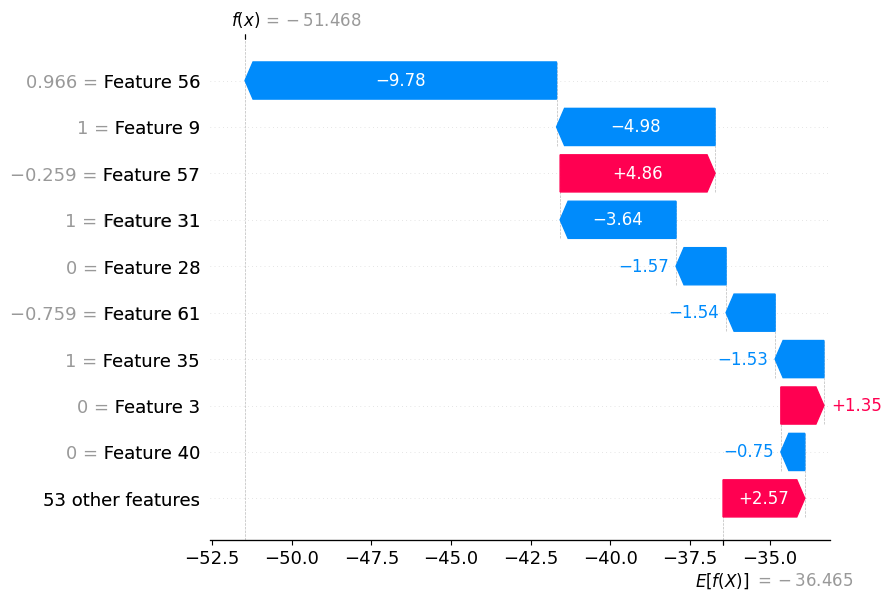

In [35]:
# Analyze input features influence
# Referenece: https://shap.readthedocs.io/en/latest/index.html
# This library is used to analyze input features of the model
def model_predict(X):
    with torch.no_grad():
        X_tensor = torch.tensor(X).float()
        outputs = model(X_tensor)
        outputs_cpu = outputs.cpu()
        return outputs_cpu.numpy()
explainer = shap.Explainer(model_predict, np.array(X_train[:100]))
shap_values = explainer(np.array(X_test[:100]))
shap.plots.waterfall(shap_values[0,:,1])


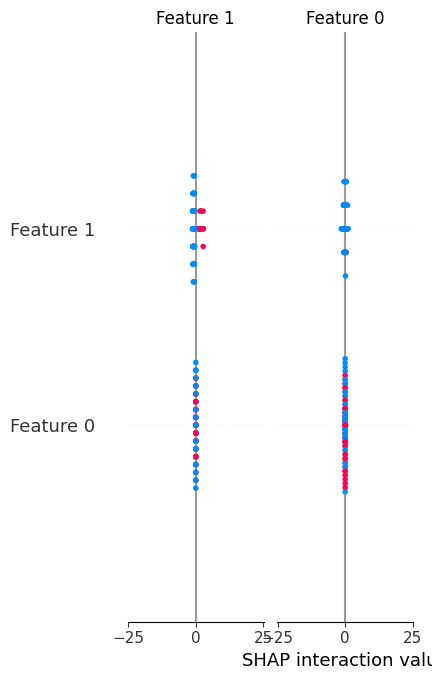

In [36]:
explainer = shap.Explainer(model_predict, np.array(X_train[:100]))
# Calculate SHAP values
shap_values = explainer.shap_values(np.array(X_test[:100]))
# Plot feature importance
shap.summary_plot(shap_values, X_test[:100])

During the training and evaluating the model I obtain F1-score near 0.7. The most influencing on the result features are: locale, location, OS, and browser. All variations of time seem to be not the crucial information for this task.

In [37]:
# Encode verification data
verification_data_tensor = torch.tensor(verification_data_encoded.values, dtype=torch.float32)
verification_data_encoded

,browser_Chrome,browser_Firefox,browser_Internet Explorer,browser_Safari,os_Debian,os_MacOS,os_Ubuntu,os_Windows 10,os_Windows 7,os_Windows 8,...,location_USA/Chicago,location_USA/Miami,location_USA/New York,location_USA/San Francisco,hour_sin,hour_cos,month_sin,month_cos,day_sin,day_cos
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-0.500000,-8.660254e-01,-5.000000e-01,0.866025,0.848644,0.528964
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.707107,7.071068e-01,8.660254e-01,0.500000,-0.968077,-0.250653
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.258819,-9.659258e-01,5.000000e-01,0.866025,-0.201299,0.979530
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.965926,-2.588190e-01,8.660254e-01,0.500000,-0.724793,0.688967
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.000000,-1.836970e-16,8.660254e-01,-0.500000,-0.651372,-0.758758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.500000,-8.660254e-01,-8.660254e-01,-0.500000,-0.724793,0.688967
39996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.000000,-1.836970e-16,-5.000000e-01,-0.866025,0.651372,-0.758758
39997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,-0.707107,-7.071068e-01,1.224647e-16,-1.000000,-0.968077,-0.250653
39998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.965926,2.588190e-01,5.000000e-01,-0.866025,-0.651372,-0.758758


In [38]:
# Make model prediction 
answer = model.predict_waldo(verification_data_tensor)
answer = pd.DataFrame(answer, columns=['is_waldo'])
print(sum(answer['is_waldo']))

117


In [39]:
# Reformat data
answer_boolean = answer['is_waldo'] == 1

In [40]:
# Update initial json file
import json
with open('task_1_verify.json', 'r') as file:
    data = json.load(file)
answer_boolean_values = answer_boolean.tolist() 
for i, record in enumerate(data):
    record['is_waldo'] = answer_boolean_values[i]
with open('task_1_verify.json', 'w') as file:
    json.dump(data, file, indent=4)